In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
def load_data(train_path, test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return train, test

In [6]:
def visualize_sale_price_distribution(y):
    plt.figure(figsize=(8,6))
    sns.histplot(y, kde=False, bins=30)
    plt.title('House Price Distributon')
    plt.xlabel('Sale Price')
    plt.ylabel('Frequency')
    plt.show()

In [7]:
def analyze_correlations(train_numerical):
    corr = train_numerical.corr()
    corr_target = corr['SalePrice'].sort_values(ascending=False)

    strong_corr = corr_target[corr_target > 0.5]

    plt.figure(figsize=(10, 10))
    sns.heatmap(train_numerical[strong_corr.index].corr(), annot=True, cmap="RdYlGn")
    plt.title('Correlation Heatmap')
    plt.show()

    return strong_corr.index

In [8]:
def plot_relationships(new_data):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(new_data.columns[:-1], 1):
        plt.subplot(3, 3, i)
        if new_data[col].dtype == 'object':
            sns.barplot(x=new_data[col], y=new_data['SalePrice'])
        else:
            sns.scatterplot(x=new_data[col], y=new_data['SalePrice'])
        plt.title(f'Relationship between {col} and SalePrice')
    plt.tight_layout()
    plt.show()

In [9]:
def preprocess_data(train, cols):
    new_data = train[cols]
    new_data.fillna(new_data.median(), inplace=True)
    return new_data

In [10]:
def train_model(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

In [11]:
def evaluate_model(model, X_val, Y_val):
    Y_predict = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(Y_val, Y_predict))
    print(f'Root Mean Squared Error: {rmse:.2f}')

In [13]:
def create_submission(test, predictions):
    submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})
    submission.to_csv('./mysubmission.csv', index=False)

In [50]:
train, test = load_data(r'house-price-prediction\train.csv', 
                         r'house-price-prediction\test.csv')

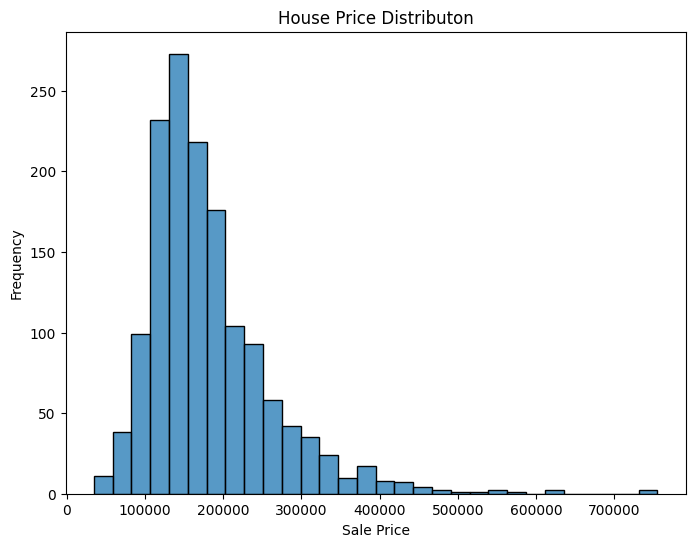

In [38]:
visualize_sale_price_distribution(train['SalePrice'])

In [39]:
train_numerical =  train.select_dtypes(exclude='object')

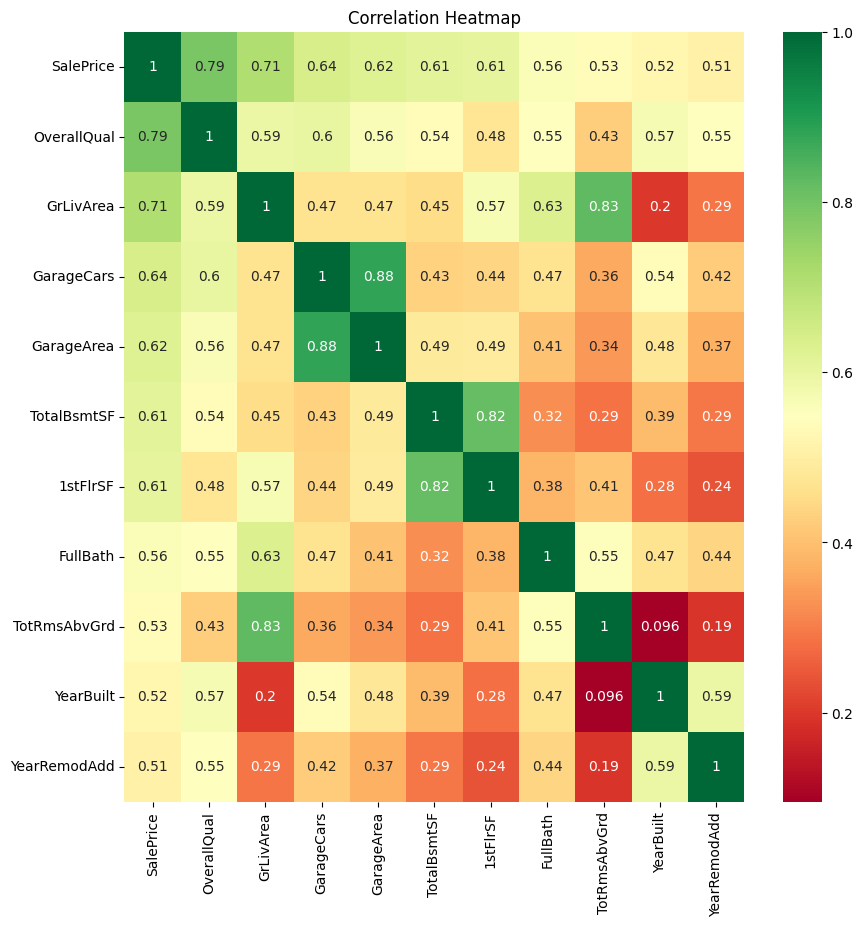

In [40]:
strong_cols = analyze_correlations(train_numerical)

In [51]:
new_data = train[strong_cols].copy()
new_data.fillna(new_data.median(), inplace=True)

In [42]:
X = new_data.drop(['SalePrice'], axis=1)
Y = new_data['SalePrice']

In [43]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=101)

In [44]:
model = train_model(X_train, Y_train)

In [45]:
evaluate_model(model, X_val, Y_val)

Root Mean Squared Error: 44348.30


In [ ]:
X_test = test[strong_cols.drop('SalePrice')].copy()
X_test.fillna(X_test.median(), inplace=True)

In [47]:
Y_test = model.predict(X_test)

In [48]:
submission = create_submission(test, Y_test)
print(submission)

None
